# Logistic Regression Model with Diabetes Database
### Made By: Uriel Baldesco 
### Dataset from Kaggle

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [2]:
filename = os.path.join("diabetes.csv")
df = pd.read_csv(filename)

<b>Looking inside the dataset<b>

In [3]:
print(f"first 5 rows:\n{df.head(5)}")
print(f"shape of df:{df.shape}")
print(f"the columns or features:{list(df.columns)}")
print("\n")

df.dtypes

first 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
shape of df:(768, 9)
the columns or features:['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']




Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<b>Inspect Data and Check for Imbalance<b>
- Is there an imbalance of patients younger and older than 30? No bc there is 51% proportion of younger patients
- Is there an imbalance of 0s and 1s values in the Outcome Label?
- When the mean > median, then the column is skewed:
    * The pregnancies column: mean=3.845052, median=3.000000
    * The glucose column: mean=120.894531, median=117.000000
    * <b>The insulin column: mean=79.799479, median=30.500000<b>
    * The diabetes pedigree function column: mean=0.471876, median=0.372500	
    * The outcome column: mean=0.348958, median=0
- Which feature has the highest range?
    * The column with most variation: Insulin
    * construct a vector of difference using df_summ.loc[] to find diff between max and min columns

In [4]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancies: 
Max=17
Min=0
Mean=3.8

Glucose:
Max=199
Min=0
Mean=120.8

BloodPressure:
Max=122
Min=0
Mean=69

SkinThickness:
Max=99
Min=0
Mean=20

Insulin:
Max=846
Min=0
Mean=79

BMI:
Max=67
Min=0
Mean=31

Age:
Max=81
Min=21
Mean=33

* Skewed: Pregnancies, Glucose, <b>Insulin<b> , DiabetesPedigreeFunction, Age

<b>Analysis of Imbalance in the Age feature and Outcome label<b>
- The proportion of younger to older patients is almost equal (51%)
- There is a severe imbalance of outcomes. There is only 35% represented that do have diabetes, where as there are 65% of patients that don't have diabetes.
    * what to do when there is an imbalance in the data points?
- Insulin column has the most range

In [5]:
younger = (df['Age'] < 30)
counter = 0
for i in younger:
    if i == True:
        counter+=1
print(f"How many patients are younger than 30? {counter}")

older_counter = 0
older = (df['Age'] >= 30)
for i in older:
    if i == True:
        older_counter+=1
print(f"How many patients are 30 or older? {older_counter}")

print(f"What is the proportion of younger patients to whole dataset? {np.sum(younger/df.shape[0])}")

How many patients are younger than 30? 396
How many patients are 30 or older? 372
What is the proportion of younger patients to whole dataset? 0.515625


In [6]:
no_diabetes = (df['Outcome']==0)
print(f"How many patients are not diagnosed with diabetes? {no_diabetes.sum()}")
print(f"What is the proportion of patients without diabetes? {np.sum(no_diabetes/df.shape[0])}")

print("\n")

yes_diabetes = (df['Outcome']==1)
print(f"How many patients are diagnosed with diabetes? {yes_diabetes.sum()}")
print(f"What is the proportion of patients with diabetes? {np.sum(yes_diabetes/df.shape[0])}")

How many patients are not diagnosed with diabetes? 500
What is the proportion of patients without diabetes? 0.6510416666666666


How many patients are diagnosed with diabetes? 268
What is the proportion of patients with diabetes? 0.3489583333333333


In [7]:
# column with the most range
print(f"This feature has the highest variation: {df.describe().loc['std'].idxmax()}")

# feature with the highest range
column_ranges = df.describe().loc['max'] - df.describe().loc['min']
column_range_name = column_ranges.idxmax()
print(f"This feature has the highest range: {column_range_name}")

This feature has the highest variation: Insulin
This feature has the highest range: Insulin


<b>Cleaning Data:<b>
* Check the correlation and mutual info of the features<br>
   <i>* only want features that are relevant to predicting the label -> features with highest correlation and mutual information against the label<i>
       <br>
   <i>* pairs of features are highly correlated or high mutual info are redundant and can be removed<i>
* Check for missing data points
* Check for outliers
* Check what data types are in each column 
* Visualize each column to see the outliers -> Winsorization - setting extreme outliers equal to a specified percentile of the data

In [8]:
# is there a correlation between any of the features with the label?
corrs = df.corr()['Outcome']
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

The glucose feature has the highest correlation with the label<br>
The blood pressure feature has the lowest correlation with the label
* The features with the highest correlation to the label are the most valuable
* Since skin thickness and blood pressure have pearson correlation < 0 with the Outcome, it means there is NO linear relationship between these columns and the label

In [9]:
# drop the skin thickness and blood pressure columns:
df = df.drop("SkinThickness", axis='columns')
df = df.drop("BloodPressure", axis='columns')
df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


In [10]:
# are there missing values?
df.isnull()
nan_count = np.sum(df.isnull())
print(nan_count)
print('\n')
print(df.isnull().values.any())

Pregnancies                 0
Glucose                     0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


False


<Axes: xlabel='Age', ylabel='Count'>

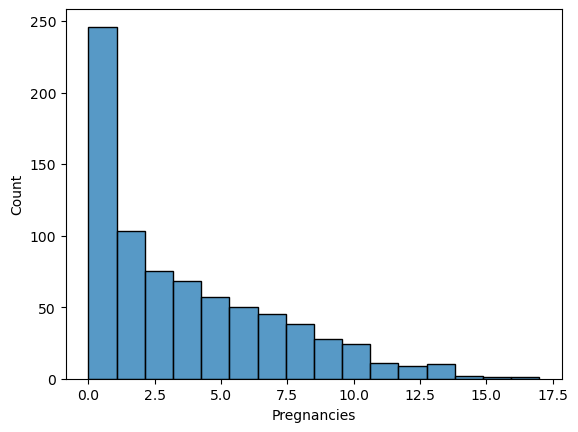

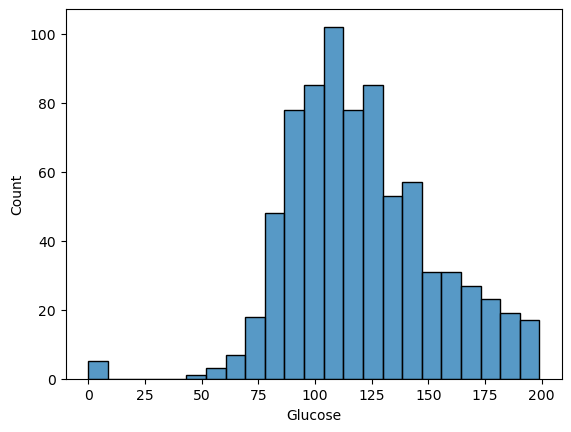

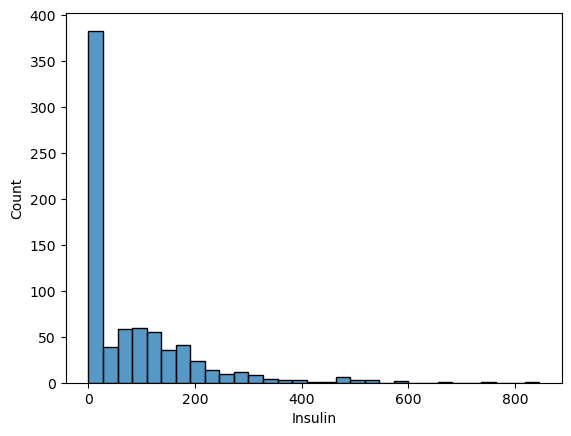

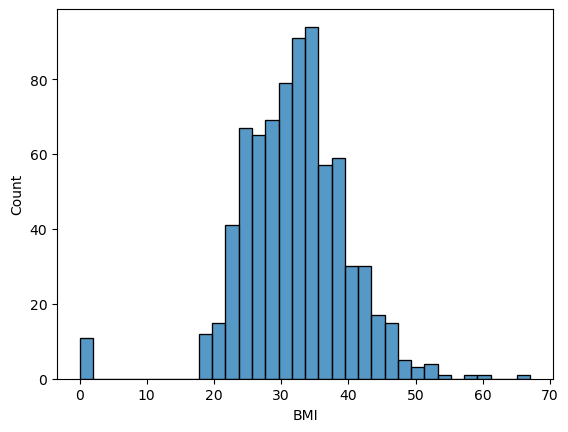

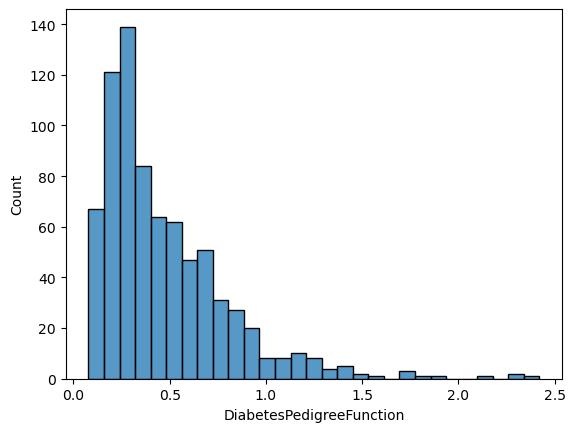

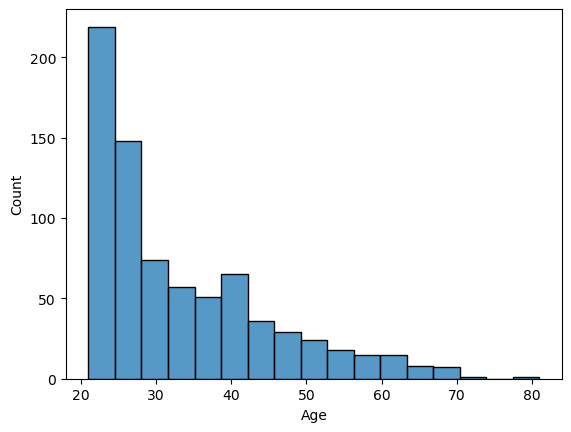

In [11]:
import seaborn as sns

plt.figure()
sns.histplot(data=df, x="Pregnancies")

plt.figure()
sns.histplot(data=df, x="Glucose")
#has an outlier at 0

plt.figure()
sns.histplot(data=df, x="Insulin")
#has an outlier at 800

plt.figure()
sns.histplot(data=df, x="BMI")
#has an outlier at 0

plt.figure()
sns.histplot(data=df, x="DiabetesPedigreeFunction")

plt.figure()
sns.histplot(data=df, x="Age")


<b>Check the Outliers<b>
- Insulin has the greatest difference between the mean and median
- Winsorize the Insulin column: 
    The code cell below uses the stats.mstats.winsorize() function to add a new column to DataFrame df. The column will be named insulin-win and will contain the winsorized version of the Insulin column, with the cutoff from the 'bottom' and the cutoff from the 'top' both set at the 1% level.

In [12]:
insulin_999 = np.percentile(df['Insulin'], 99.99)
print(f"This value in insulin is the 99.99th percentile: {insulin_999}")

# winsorize insulin column bc has most skewed data
import scipy.stats as stats
df['Insulin-win'] = stats.mstats.winsorize(df['Insulin'], limits=[0.01, 0.01])
df.head(5)

This value in insulin is the 99.99th percentile: 838.1765999999925


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin-win
0,6,148,0,33.6,0.627,50,1,0
1,1,85,0,26.6,0.351,31,0,0
2,8,183,0,23.3,0.672,32,1,0
3,1,89,94,28.1,0.167,21,0,94
4,0,137,168,43.1,2.288,33,1,168


In [13]:
# z-score for all features
df_zscores = df.select_dtypes(include=['number']).apply(stats.zscore)
df_zscores
# a data point with an abs value z-score > 3 is an outlier 

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin-win
0,0.639947,0.848324,-0.692891,0.204013,0.468492,1.425995,1.365896,-0.715091
1,-0.844885,-1.123396,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120,-0.715091
2,1.233880,1.943724,-0.692891,-1.103255,0.604397,-0.105584,1.365896,-0.715091
3,-0.844885,-0.998208,0.123302,-0.494043,-0.920763,-1.041549,-0.732120,0.137787
4,-1.141852,0.504055,0.765836,1.409746,5.484909,-0.020496,1.365896,0.809202
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.870031,0.115169,-0.908682,2.532136,-0.732120,0.918080
764,-0.547919,0.034598,-0.692891,0.610154,-0.398282,-0.531023,-0.732120,-0.715091
765,0.342981,0.003301,0.279594,-0.735190,-0.685193,-0.275760,-0.732120,0.301104
766,-0.844885,0.159787,-0.692891,-0.240205,-0.371101,1.170732,1.365896,-0.715091


<b>Setting up the features and target label:<b>

* Target Variable is 'Outcome'
* Features: Pregnancies, Glucose, Insulin, BMI, Diabetes Pedigree Function

<b>Why am I using Logistic Regression for this Diabetes Dataset?<b>
- Logistic Regression is used for low model complexity. Making predictions in medical data sets is best with logistic regression due to the small amount of patient data.

In [15]:
list(df.columns)
feature_list=['Pregnancies',
 'Glucose',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [16]:
y = df['Outcome']
X = df[feature_list]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1234)
print(X_train.shape) #shape of train examples
print(X_test.shape) #shape of test examples

(514, 6)
(254, 6)


<b>Train<b>

In [24]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    model=LogisticRegression(C=c)
    model.fit(X_train, y_train)
    probability_predictions = model.predict_proba(X_test)
    l_loss = log_loss(y_test, probability_predictions)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return l_loss, acc_score

In [26]:
loss, acc = train_test_LR(X_train, y_train, X_test, y_test)
print('Log loss: ' + str(loss))
print('Accuracy: ' + str(acc))

Log loss: 0.4854512848742763
Accuracy: 0.7795275590551181


<b>Train on Different Hyperparameter Values<b>
    
<i>Smaller C regularization values are best for specify stronger regularization and a simpler model<br>Since this dataset has < 1000 examples then it is a smaller dataset and should have smaller C values<i>

In [28]:
cs = [10**i for i in range(-10,5)]
cs

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000]

In [29]:
ll_cs = []
acc_cs = []
for c in cs:
    ll, acc = train_test_LR(X_train, y_train, X_test, y_test, c)
    print('c of {0}:\nlog loss of {1}\naccuracy score of {2}'.format(c, ll,acc))
    ll_cs.append(ll)
    acc_cs.append(acc)

c of 1e-10:
log loss of 0.650223051423903
accuracy score of 0.6456692913385826
c of 1e-09:
log loss of 0.6501769069697607
accuracy score of 0.6456692913385826
c of 1e-08:
log loss of 0.6497222197346313
accuracy score of 0.6456692913385826
c of 1e-07:
log loss of 0.6457419635367436
accuracy score of 0.6456692913385826
c of 1e-06:
log loss of 0.6243927061295528
accuracy score of 0.65748031496063
c of 1e-05:
log loss of 0.5585774720086221
accuracy score of 0.7047244094488189
c of 0.0001:
log loss of 0.5084115005524248
accuracy score of 0.7362204724409449
c of 0.001:
log loss of 0.48841286865609973
accuracy score of 0.7480314960629921
c of 0.01:
log loss of 0.4856018552232687
accuracy score of 0.7677165354330708
c of 0.1:
log loss of 0.4834851842978427
accuracy score of 0.7755905511811023
c of 1:
log loss of 0.4854512848742763
accuracy score of 0.7795275590551181
c of 10:
log loss of 0.48688488557310666
accuracy score of 0.7755905511811023
c of 100:
log loss of 0.4874857569123801
accuracy 

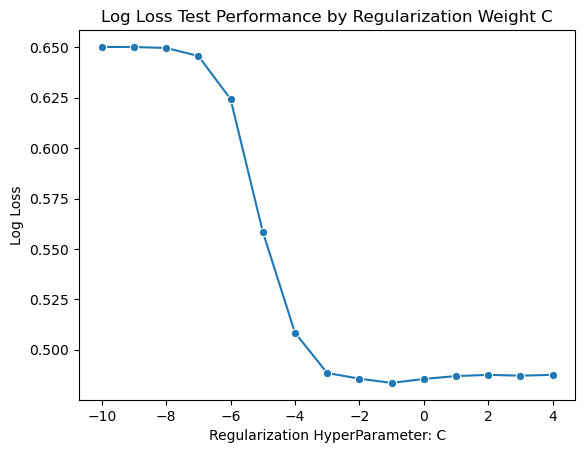

In [31]:
# take the log 10 of the hyperparam values 
cs_log10 = np.log10(cs)

fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=cs_log10, y=ll_cs, marker='o')
plt.title('Log Loss Test Performance by Regularization Weight C')
ax.set_xlabel('Regularization HyperParameter: C')
ax.set_ylabel('Log Loss')
plt.show()

<b>Analysis<b>
- C=1 has the highest accuracy, but C=0.1 has lower log loss = more accurate probabilistic predictions 

- C=1
- Log loss: 0.4855
- Accuracy: 0.7795
    